In [1]:
# Importing the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

# graphics in svg format are more sharp and legible
%config InlineBackend.figure_format = 'svg'

# Data Understanding

In [2]:
# Read the data
train = pd.read_csv('U:\\projects\\data Science\\Energy Prediction Use Case\\data\\training.csv')
test = pd.read_csv('U:\\projects\\data Science\\Energy Prediction Use Case\\data\\testing.csv')

In [3]:
train.shape

(14803, 32)

In [4]:
test.shape

(4932, 32)

## Exploratory data analysis

In [5]:
# Merge data into 1 to perform Exploratory data analysis
energy = pd.concat([train, test])

In [6]:
# sort by timestamp and save it in csv for future use
energy['date'] = pd.to_datetime(energy['date'], format="%Y-%m-%d %H:%M:%S")
energy.sort_values(by=['date'], inplace=True)
energy.to_csv(path_or_buf='U:\\projects\\data Science\\Energy Prediction Use Case\\data\\energy_merged.csv',index=False)

In [7]:
energy.head()

,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,...,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2,NSM,WeekStatus,Day_of_week
0,2016-01-11 17:00:00,60,30,19.89,47.596667,19.2,44.790000,19.79,44.730000,19.000000,...,733.5,92.0,7.000000,63.000000,5.3,13.275433,13.275433,61200,Weekday,Monday
1,2016-01-11 17:10:00,60,30,19.89,46.693333,19.2,44.722500,19.79,44.790000,19.000000,...,733.6,92.0,6.666667,59.166667,5.2,18.606195,18.606195,61800,Weekday,Monday
2,2016-01-11 17:20:00,50,30,19.89,46.300000,19.2,44.626667,19.79,44.933333,18.926667,...,733.7,92.0,6.333333,55.333333,5.1,28.642668,28.642668,62400,Weekday,Monday
0,2016-01-11 17:30:00,50,40,19.89,46.066667,19.2,44.590000,19.79,45.000000,18.890000,...,733.8,92.0,6.000000,51.500000,5.0,45.410389,45.410389,63000,Weekday,Monday
3,2016-01-11 17:40:00,60,40,19.89,46.333333,19.2,44.530000,19.79,45.000000,18.890000,...,733.9,92.0,5.666667,47.666667,4.9,10.084097,10.084097,63600,Weekday,Monday


In [8]:
energy.shape

(19735, 32)

In [9]:
energy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19735 entries, 0 to 14802
Data columns (total 32 columns):
date           19735 non-null datetime64[ns]
Appliances     19735 non-null int64
lights         19735 non-null int64
T1             19735 non-null float64
RH_1           19735 non-null float64
T2             19735 non-null float64
RH_2           19735 non-null float64
T3             19735 non-null float64
RH_3           19735 non-null float64
T4             19735 non-null float64
RH_4           19735 non-null float64
T5             19735 non-null float64
RH_5           19735 non-null float64
T6             19735 non-null float64
RH_6           19735 non-null float64
T7             19735 non-null float64
RH_7           19735 non-null float64
T8             19735 non-null float64
RH_8           19735 non-null float64
T9             19735 non-null float64
RH_9           19735 non-null float64
T_out          19735 non-null float64
Press_mm_hg    19735 non-null float64
RH_out        

In [10]:
energy.describe().T

,count,mean,std,min,25%,50%,75%,max
Appliances,19735.0,97.694958,102.524891,10.000000,50.000000,60.000000,100.000000,1080.000000
lights,19735.0,3.801875,7.935988,0.000000,0.000000,0.000000,0.000000,70.000000
T1,19735.0,21.686571,1.606066,16.790000,20.760000,21.600000,22.600000,26.260000
RH_1,19735.0,40.259739,3.979299,27.023333,37.333333,39.656667,43.066667,63.360000
T2,19735.0,20.341219,2.192974,16.100000,18.790000,20.000000,21.500000,29.856667
RH_2,19735.0,40.420420,4.069813,20.463333,37.900000,40.500000,43.260000,56.026667
T3,19735.0,22.267611,2.006111,17.200000,20.790000,22.100000,23.290000,29.236000
RH_3,19735.0,39.242500,3.254576,28.766667,36.900000,38.530000,41.760000,50.163333
T4,19735.0,20.855335,2.042884,15.100000,19.530000,20.666667,22.100000,26.200000
RH_4,19735.0,39.026904,4.341321,27.660000,35.530000,38.400000,42.156667,51.090000


In [11]:
# lights have many zeros
energy['lights'].value_counts().head()

0     15252
10     2212
20     1624
30      559
40       77
Name: lights, dtype: int64

In [12]:
# correlation matrix
pd.options.display.float_format = '{:,.4f}'.format
energy.corr()

,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,...,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2,NSM
Appliances,1.0000,0.1973,0.0554,0.0860,0.1201,-0.0605,0.0851,0.0363,0.0403,0.0170,...,-0.0515,0.0992,-0.0349,-0.1523,0.0871,0.0002,0.0154,-0.0111,-0.0111,0.2172
lights,0.1973,1.0000,-0.0235,0.1070,-0.0056,0.0510,-0.0974,0.1312,-0.0089,0.1149,...,-0.0088,-0.0744,-0.0106,0.0685,0.0603,0.0200,-0.0363,0.0005,0.0005,0.2550
T1,0.0554,-0.0235,1.0000,0.1640,0.8368,-0.0025,0.8924,-0.0286,0.8770,0.0979,...,0.0718,0.6828,-0.1506,-0.3455,-0.0877,-0.0762,0.5713,-0.0062,-0.0062,0.1787
RH_1,0.0860,0.1070,0.1640,1.0000,0.2698,0.7975,0.2532,0.8447,0.1062,0.8804,...,0.7640,0.3408,-0.2940,0.2741,0.2049,-0.0211,0.6391,-0.0007,-0.0007,0.0185
T2,0.1201,-0.0056,0.8368,0.2698,1.0000,-0.1656,0.7352,0.1215,0.7621,0.2316,...,0.1573,0.7923,-0.1330,-0.5053,0.0525,-0.0697,0.5826,-0.0111,-0.0111,0.2546
RH_2,-0.0605,0.0510,-0.0025,0.7975,-0.1656,1.0000,0.1373,0.6783,-0.0473,0.7214,...,0.6765,0.0337,-0.2556,0.5849,0.0692,-0.0054,0.4992,0.0063,0.0063,-0.1832
T3,0.0851,-0.0974,0.8924,0.2532,0.7352,0.1373,1.0000,-0.0112,0.8528,0.1227,...,0.1346,0.6994,-0.1900,-0.2817,-0.1008,-0.1023,0.6459,-0.0052,-0.0052,0.0376
RH_3,0.0363,0.1312,-0.0286,0.8447,0.1215,0.6783,-0.0112,1.0000,-0.1405,0.8990,...,0.8335,0.1182,-0.2333,0.3562,0.2632,0.0170,0.4144,-0.0005,-0.0005,-0.0523
T4,0.0403,-0.0089,0.8770,0.1062,0.7621,-0.0473,0.8528,-0.1405,1.0000,-0.0487,...,-0.0255,0.6635,-0.0753,-0.3886,-0.1857,-0.1048,0.5195,-0.0018,-0.0018,0.0883
RH_4,0.0170,0.1149,0.0979,0.8804,0.2316,0.7214,0.1227,0.8990,-0.0487,1.0000,...,0.8566,0.2933,-0.2507,0.3368,0.3002,0.0026,0.6165,-0.0018,-0.0018,-0.0190


## Data Visualization

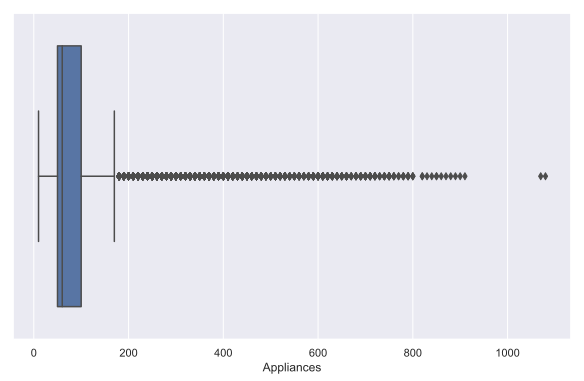

In [13]:
# Box plots of Appliances energy utilization in Wh
plt.rcParams['figure.figsize'] = 10,6
sns.boxplot(x='Appliances', data=energy)

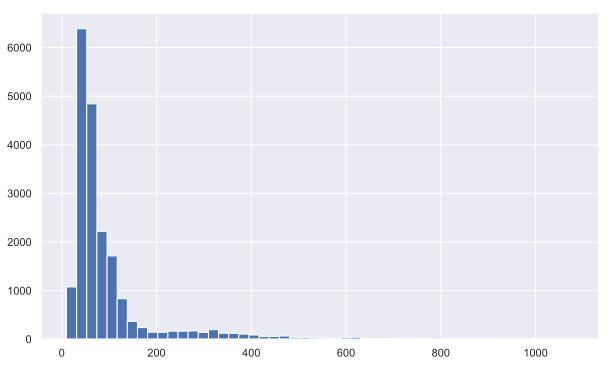

In [14]:
energy['Appliances'].hist(bins=50, figsize=(10,6))

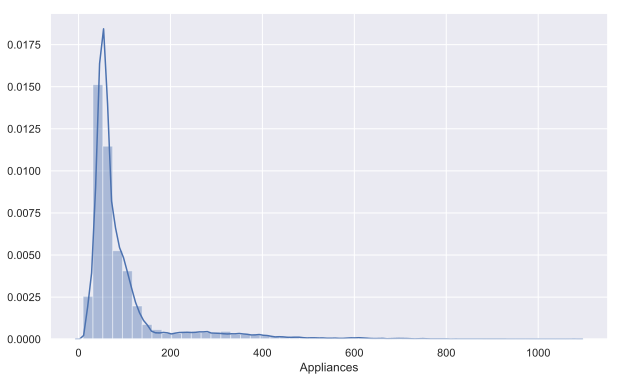

In [15]:
#Dist plot of Appliances
plt.rcParams['figure.figsize'] = 10,6
sns.distplot(energy['Appliances'])

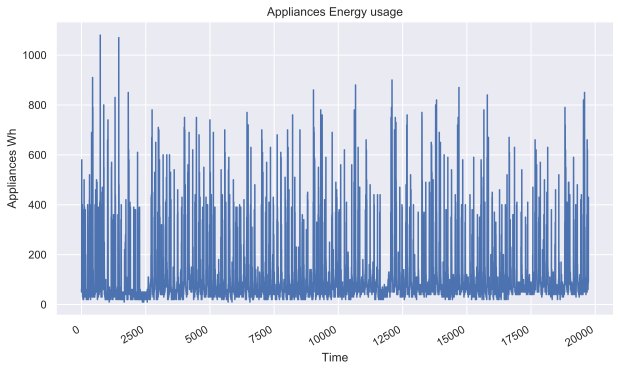

In [16]:
# Visualising the appliances energy usage Wh with time
plt.plot(energy['Appliances'].to_numpy())
plt.gcf().autofmt_xdate()
plt.title('Appliances Energy usage')
plt.xlabel('Time')
plt.ylabel('Appliances Wh')
plt.show()

C:\Users\T2211377\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\plotting\_matplotlib\converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


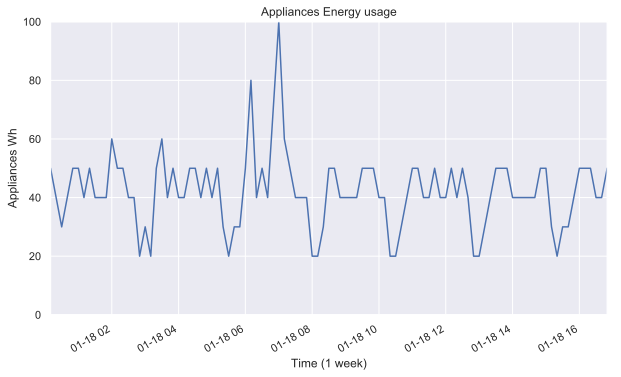

In [17]:
# Visualising the appliances energy usage Wh within a week
x=energy['date'][907:1008].to_numpy()
y=energy['Appliances'][907:1008].to_numpy()
plt.axis([min(energy['date'][907:1008]), max(energy['date'][907:1008]), 0, 100])
plt.plot(x,y)
plt.gcf().autofmt_xdate()
plt.title('Appliances Energy usage')
plt.xlabel('Time (1 week)')
plt.ylabel('Appliances Wh')
plt.show()

In [ ]:
# scatter plot matrix
%matplotlib inline
plt.style.use('ggplot')

from pandas.plotting import scatter_matrix

scatter_matrix(energy, figsize=(14,14))
plt.show()

In [ ]:
plt.rcParams['figure.figsize'] = 14,14
sns.pairplot(energy)